In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import os

In [2]:
!unzip PianoFingeringDataset_v1.2.zip

Archive:  PianoFingeringDataset_v1.2.zip
   creating: PianoFingeringDataset_v1.2/
  inflating: __MACOSX/._PianoFingeringDataset_v1.2  
  inflating: PianoFingeringDataset_v1.2/.DS_Store  
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._.DS_Store  
   creating: PianoFingeringDataset_v1.2/FingeringFiles/
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._FingeringFiles  
  inflating: PianoFingeringDataset_v1.2/List.pdf  
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._List.pdf  
  inflating: PianoFingeringDataset_v1.2/List.csv  
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._List.csv  
  inflating: PianoFingeringDataset_v1.2/README-ja.pdf  
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._README-ja.pdf  
  inflating: PianoFingeringDataset_v1.2/README.pdf  
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._README.pdf  
   creating: PianoFingeringDataset_v1.2/ScorePDF/
  inflating: __MACOSX/PianoFingeringDataset_v1.2/._ScorePDF  
  inflating: PianoFingeringDataset_v1.2/Fingerin

In [3]:
directory_path = 'PianoFingeringDataset_v1.2/FingeringFiles/'



# Loads in ONE big CONCATENATED dataset from ALL dataframes
# my_dfs = []

# for filename in os.listdir(directory_path):
#     file_path = os.path.join(directory_path, filename)
#     if os.path.isfile(file_path):
#         df = pd.read_table(file_path, sep="\t", skiprows=1, names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"])
#         my_dfs.append(df)
# #         print(df)

# big_df = pd.concat(my_dfs)
# print(big_df)


# load in just the fingering for 014-3: Mozart Piano Sonata K 330 in C major, 2nd mov.
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path) and filename == os.listdir(directory_path)[0]:
        df = pd.read_table(file_path, sep="\t", skiprows=1, names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"])
        print(filename)
        print(df.head(10))



009-8_fingering.txt
   noteID  onset_time  offset_time spelled_pitch  onset_velocity  \
0       0    0.366054     0.699388            D5              64   
1       1    0.700070     1.025910            D5              64   
2       2    1.047040     1.412410           Bb4              67   
3       3    1.413090     1.746430           Bb4              64   
4       4    1.413090     1.746430            G4              64   
5       5    1.747110     2.072940           Bb4              64   
6       6    1.747110     2.072940            G4              64   
7       7    2.094080     2.280170            A4              67   
8       8    2.094080     2.459450           F#4              67   
9       9    2.291080     2.449220            G4              64   

   offset_velocity  channel  finger_number  
0               80        0              4  
1               80        0              4  
2               80        0              2  
3               80        0              3  
4     

In [4]:
df.isna().sum()

,0
noteID,0
onset_time,0
offset_time,0
spelled_pitch,0
onset_velocity,0
offset_velocity,0
channel,0
finger_number,0


# Idea 1: simple linear regression to predict finger_number

In [5]:
spelled_pitch_values = set()

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_table(file_path, sep="\t", skiprows=1, names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"])
        spelled_pitch_values.update(df['spelled_pitch'].unique())



# convert "spelled pitch" field to a number: create the mapping in the first place
spelled_pitch_values = sorted(spelled_pitch_values)

pitch_to_int_mapping = {p:i for i, p in enumerate(spelled_pitch_values)}

# print(len(spelled_pitch_values))
# print(len(pitch_to_int_mapping))
print(pitch_to_int_mapping)

{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10, 'B6': 11, 'Bb1': 12, 'Bb2': 13, 'Bb3': 14, 'Bb4': 15, 'Bb5': 16, 'Bb6': 17, 'C#1': 18, 'C#2': 19, 'C#3': 20, 'C#4': 21, 'C#5': 22, 'C#6': 23, 'C#7': 24, 'C1': 25, 'C2': 26, 'C3': 27, 'C4': 28, 'C5': 29, 'C6': 30, 'C7': 31, 'D1': 32, 'D2': 33, 'D3': 34, 'D4': 35, 'D5': 36, 'D6': 37, 'D7': 38, 'E1': 39, 'E2': 40, 'E3': 41, 'E4': 42, 'E5': 43, 'E6': 44, 'E7': 45, 'Eb1': 46, 'Eb2': 47, 'Eb3': 48, 'Eb4': 49, 'Eb5': 50, 'Eb6': 51, 'Eb7': 52, 'F#1': 53, 'F#2': 54, 'F#3': 55, 'F#4': 56, 'F#5': 57, 'F#6': 58, 'F#7': 59, 'F1': 60, 'F2': 61, 'F3': 62, 'F4': 63, 'F5': 64, 'F6': 65, 'F7': 66, 'G#1': 67, 'G#2': 68, 'G#3': 69, 'G#4': 70, 'G#5': 71, 'G#6': 72, 'G1': 73, 'G2': 74, 'G3': 75, 'G4': 76, 'G5': 77, 'G6': 78}


In [6]:
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path) and filename == os.listdir(directory_path)[0]:
        df = pd.read_table(file_path, sep="\t", skiprows=1, names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"])

num_data, num_features = df.shape
x = df.iloc[:, 0:num_features - 1]
y = df.iloc[:, num_features - 1]


# convert "spelled pitch" field to a number
x['spelled_pitch'] = x['spelled_pitch'].map(pitch_to_int_mapping)


x = torch.tensor(x.values.tolist(), dtype=torch.float32)
y = torch.tensor(y.values.astype(float).tolist())
y = y.unsqueeze(1)   # conver from size [289] to size [289, 1]

print(f"x's shape is {x.shape}")
print(f"y's shape is {y.shape}")

x's shape is torch.Size([393, 7])
y's shape is torch.Size([393, 1])


In [9]:
print(f"num features is {num_features} and num data is {num_data}")

num features is 8 and num data is 596


In [10]:
# Pytorch code that does the same least squares fitting, but nn.Module-ized. Iterative regression

class LinearRegressionBaseline(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(LinearRegressionBaseline, self).__init__()
        self.linear = nn.Linear(input_dims, output_dims)

    def forward(self, x):
        return self.linear(x)

In [11]:
my_linear_model = LinearRegressionBaseline(num_features - 1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(my_linear_model.parameters(), lr=1e-2)    # Needs a VERY small learning rate, else NaN.


# normalize inputs before feeding to model
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()


print(x.shape)
print(y.shape)
print(my_linear_model(x).shape)


torch.Size([596, 7])
torch.Size([596, 1])
torch.Size([596, 1])


In [12]:

epochs = 5000
for epoch in range(epochs):
    # Forward pass
    y_pred = my_linear_model(x)
    loss = criterion(y_pred, y)
#     print(x.shape)
#     print(y.shape)
#     print(y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [5000/5000], Loss: 0.7478


In [13]:
# Check on testing set

x_test = x
y_test = y




# Ensure your model is in evaluation mode
my_linear_model.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    # Forward pass: Predict on the test set
    y_test_pred = my_linear_model(x_test)

    # Calculate the loss on the test set
    test_loss = criterion(y_test_pred, y_test)

    # Optional: Convert predictions to numpy for further analysis if needed
    y_test_pred_np = y_test_pred.cpu().numpy() if y_test_pred.is_cuda else y_test_pred.numpy()
    y_test_np = y_test.cpu().numpy() if y_test.is_cuda else y_test.numpy()

# Print the results
print("Test Results:")
print(f"Test Loss: {test_loss.item():.4f}")
print("Sample Predictions:")
for i in range(min(5, len(y_test_pred))):  # Display up to 5 predictions
    print(f"Predicted: {y_test_pred_np[i]}, Actual: {y_test_np[i]}")

Test Results:
Test Loss: 0.7477
Sample Predictions:
Predicted: [-0.08164215], Actual: [0.34832925]
Predicted: [0.10481739], Actual: [0.7019991]
Predicted: [-0.01121902], Actual: [0.34832925]
Predicted: [0.10969925], Actual: [1.0556691]
Predicted: [0.0592041], Actual: [0.34832925]


In [14]:
# Compare with Scikit Normal Equation Result

import numpy as np
from sklearn.linear_model import LinearRegression
import torch

# Assuming x and y are your training tensors
x_np = x.numpy() if isinstance(x, torch.Tensor) else x
y_np = y.numpy() if isinstance(y, torch.Tensor) else y
y_np = y_np.reshape(-1)

print(x_np.shape)
print(y_np.shape)


# Validate with Scikit-Learn
lr = LinearRegression(fit_intercept=True)
lr.fit(x_np, y_np)

# Print Scikit-Learn weights for comparison
print("Weights (Scikit-Learn):", np.hstack([lr.intercept_, lr.coef_]))


x_test_np = x_np
y_test_np = y_np

# Predict on the test set
y_test_pred = lr.predict(x_test_np)

# Compute Mean Squared Error (MSE) loss
test_loss = np.mean((y_test_pred - y_test_np) ** 2)

# Print the loss
print("Test Loss (Scikit-Learn):", test_loss)    # About the same loss: 0.53!

(596, 7)
(596,)
Weights (Scikit-Learn): [-1.3505457e+02 -2.3877855e-02  7.1371086e+01 -7.0912827e+01
 -9.6703708e-02  9.3193579e+00  2.8750098e-06 -2.0170772e+02]
Test Loss (Scikit-Learn): 0.21523653


# Idea 2: Add more layers

In [15]:
# deep neural net with more layers

class DeepNeuralNet(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(DeepNeuralNet, self).__init__()
        self.mlp_layer = nn.Sequential(
            nn.Linear(input_dims, 4 * input_dims),
            nn.ReLU(),
            nn.Linear(4 * input_dims, output_dims),
        )


    def forward(self, x):
        return self.mlp_layer(x)

In [16]:
dnn_model = DeepNeuralNet(num_features - 1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=1e-2)    # Needs a VERY small learning rate, else NaN.


# normalize inputs before feeding to model
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()


print(x.shape)
print(y.shape)
print(dnn_model(x).shape)


# Adding more layers helps a lot!

epochs = 50000
for epoch in range(epochs):
    # Forward pass
    y_pred = dnn_model(x)
    loss = criterion(y_pred, y)
#     print(x.shape)
#     print(y.shape)
#     print(y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

torch.Size([596, 7])
torch.Size([596, 1])
torch.Size([596, 1])


KeyboardInterrupt: 

# Testing code

Testing on some random other piece

In [17]:
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path) and filename == os.listdir(directory_path)[1]:
        test_df = pd.read_table(file_path, sep="\t", skiprows=1, names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"])
        print(filename)

x_test = test_df.iloc[:, 0:num_features - 1]
y_test = test_df.iloc[:, num_features - 1]

x_test['spelled_pitch'] = x_test['spelled_pitch'].map(pitch_to_int_mapping)


# print(x_test)

# NORMALIZE FIRST
# Normalize x_test
for col in x_test.columns:
    std = x_test[col].std()
    if std == 0:  # Check if all values are the same
        x_test[col] = 0  # Assign all entries in this column to 0
    else:
        x_test[col] = (x_test[col] - x_test[col].mean()) / std

# Normalize y_test
y_test_std = y_test.std()
if y_test_std == 0:  # Check if all values are the same
    y_test = 0  # Assign all entries in y_test to 0
else:
    y_test = (y_test - y_test.mean()) / y_test_std



x_test = torch.tensor(x_test.values.tolist(), dtype=torch.float32)
y_test = torch.tensor(y_test.values.astype(float).tolist())
y_test = y_test.unsqueeze(1)   # conver from size [289] to size [289, 1]


# print(y_test)


# print(x_test.isna().sum())
# print(y_test.shape)

010-5_fingering.txt


TypeError: could not convert string to float: '-2_-3'

In [18]:

# Check on testing set

# x_test = x
# y_test = y

# print(x_test)
# print(y_test)


# Ensure your model is in evaluation mode
dnn_model.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    # Forward pass: Predict on the test set
    y_test_pred = dnn_model(x_test)

    # Calculate the loss on the test set
    test_loss = criterion(y_test_pred, y_test)

    # Optional: Convert predictions to numpy for further analysis if needed
    y_test_pred_np = y_test_pred.cpu().numpy() if y_test_pred.is_cuda else y_test_pred.numpy()
    y_test_np = y_test.cpu().numpy() if y_test.is_cuda else y_test.numpy()

# Print the results
print("Test Results:")
print(f"Test Loss: {test_loss.item():.4f}")
print("Sample Predictions:")
for i in range(min(5, len(y_test_pred))):  # Display up to 5 predictions
    print(f"Predicted: {y_test_pred_np[i]}, Actual: {y_test_np[i]}")

TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame

# Idea 3: Seq to Seq Modeling

Obviously the above doesn't work at all because the specific fingering DEPENDS on the previous fingerings!

In [73]:
# Strategy 1: Recurrent Neural Network

rnn = nn.RNN(10, 20, 2)
i = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(i, h0)


In [74]:
# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        # Read the file into a DataFrame
        new_df = pd.read_table(
            file_path,
            sep="\t",
            skiprows=1,
            names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"]
        )

        dataframes.append(new_df)

# Concatenate all DataFrames in the list into a single DataFrame
train_df = pd.concat(dataframes, ignore_index=True)






# some labels have "_" in them: default to using the int on the left!
train_df.iloc[:, num_features - 1] = train_df.iloc[:, num_features - 1].where(
    ~train_df.iloc[:, num_features - 1].str.contains('_', na=False),
    train_df.iloc[:, num_features - 1].str.split('_').str[0]
).astype(int)


# train_df = train_df.head(20000)  # for testing, we will only take the first 10000 rows. Can use more for training when you have GPUs



# Split into features (X) and target (y)
x_train = train_df.iloc[:, 0:num_features - 1]
y_train = train_df.iloc[:, num_features - 1]



# Map "spelled_pitch" to integers using the provided mapping
x_train['spelled_pitch'] = x_train['spelled_pitch'].map(pitch_to_int_mapping)
y_train = y_train.astype(int)

# Ensure target values (y_train) are positive for CrossEntropyLoss
y_train += 5

# # Print the maximum value of y_train to verify
# print("Maximum y_train value:", y_train.max())
# print(x_train)
# print(y_train)

In [75]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

def create_sequences(x_df, y_series, sequence_length):
    x_sequences = []
    y_sequences = []
    for i in range(len(x_df) - sequence_length + 1):
        # Extract a sequence of notes (features)
        x_seq = x_df.iloc[i:i + sequence_length].values  # Shape: [T, num_features]
        # Extract the corresponding sequence of finger labels
        y_seq = y_series.iloc[i:i + sequence_length].values  # Shape: [T]
        x_sequences.append(x_seq)
        y_sequences.append(y_seq)

    return np.array(x_sequences).astype(int), np.array(y_sequences).astype(int)

# Example usage
sequence_length = 10  # Define the sequence length
x_sequences, y_sequences = create_sequences(x_train, y_train, sequence_length)

# Convert to PyTorch tensors
x_sequences = torch.tensor(x_sequences, dtype=torch.float32)  # Shape: [num_sequences, T, num_features]
y_sequences = torch.tensor(y_sequences, dtype=torch.long)  # Shape: [num_sequences, T]

print(x_sequences.shape)
print(y_sequences.shape)

torch.Size([100031, 10, 7])
torch.Size([100031, 10])


In [76]:
class PianoDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

# Create Dataset
dataset = PianoDataset(x_sequences, y_sequences)

from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x_sequences, y_sequences, test_size=0.2, random_state=42
)

# Create Dataset objects
train_dataset = PianoDataset(x_train, y_train)
test_dataset = PianoDataset(x_test, y_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [77]:
for x_batch, y_batch in train_loader:
    print(x_batch.shape)  # [batch_size, sequence_length, num_features]
    print(y_batch.shape)  # [batch_size, sequence_length]
    # Pass x_batch to your RNN model


torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([512, 10, 7])
torch.Size([512, 10])
torch.Size([5

In [78]:
import torch
import torch.nn as nn

class SeqToSeqTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_heads=8, num_layers=4, dropout=0.1):
        super(SeqToSeqTransformer, self).__init__()
        # Embedding layer to project input features to hidden_size
        self.embedding = nn.Linear(input_size, hidden_size)

        # Transformer encoder
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_size * 4,
            dropout=dropout,
            batch_first=True
        )

        # Fully connected layer to map transformer output to output_size
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Embed input to the same dimension as hidden_size
        x = self.embedding(x)

        # For simplicity, using encoder-only transformer (typical for sequence classification or tagging)
        # If needed, you can define and use a separate decoder
        x = self.transformer(x, x)  # Pass through the transformer encoder

        # Map to the output space
        x = self.fc(x)
        return x


# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming x_sequences is your input data
input_size = x_sequences.shape[2]  # Number of features
hidden_size = 512
output_size = 11   # Number of unique finger labels

# Instantiate and move the model to the GPU if available
model = SeqToSeqTransformer(input_size, hidden_size, output_size).to(device)

# Print model summary
# print(model)

In [79]:
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)


In [96]:
# Training Loop
epochs = 50

for epoch in range(epochs):
    print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')  # Logging

    model.train()  # Ensure the model is in training mode

    for x_batch, y_batch in train_loader:
        # Move data to the device (GPU or CPU)
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = model(x_batch)  # Shape: [batch_size, sequence_length, output_size]
        loss = criterion(outputs.view(-1, output_size), y_batch.view(-1))  # Flatten for CrossEntropyLoss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()




Epoch [0/50], Loss: 0.5517
Epoch [1/50], Loss: 0.5181
Epoch [2/50], Loss: 0.8127
Epoch [3/50], Loss: 0.5469
Epoch [4/50], Loss: 0.5538
Epoch [5/50], Loss: 0.5330
Epoch [6/50], Loss: 0.5724
Epoch [7/50], Loss: 0.5742
Epoch [8/50], Loss: 0.5263
Epoch [9/50], Loss: 0.5749
Epoch [10/50], Loss: 0.5170
Epoch [11/50], Loss: 0.5330
Epoch [12/50], Loss: 0.5193
Epoch [13/50], Loss: 0.6106
Epoch [14/50], Loss: 0.5485
Epoch [15/50], Loss: 0.5018
Epoch [16/50], Loss: 0.5130
Epoch [17/50], Loss: 0.5034
Epoch [18/50], Loss: 0.4805
Epoch [19/50], Loss: 0.4990
Epoch [20/50], Loss: 0.5750
Epoch [21/50], Loss: 0.5185
Epoch [22/50], Loss: 0.5342
Epoch [23/50], Loss: 0.5077
Epoch [24/50], Loss: 0.5142
Epoch [25/50], Loss: 0.5047
Epoch [26/50], Loss: 0.4379
Epoch [27/50], Loss: 0.5027
Epoch [28/50], Loss: 0.4697
Epoch [29/50], Loss: 0.4673
Epoch [30/50], Loss: 0.4781
Epoch [31/50], Loss: 0.4373
Epoch [32/50], Loss: 0.4931
Epoch [33/50], Loss: 0.5083


KeyboardInterrupt: 

In [97]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    total_correct = 0
    total_samples = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(x_batch)  # Shape: [batch_size, sequence_length, num_classes]

            # Calculate loss
            loss = criterion(outputs.view(-1, outputs.size(-1)), y_batch.view(-1))
            total_loss += loss.item()

            # Get predictions
            preds = torch.argmax(outputs, dim=-1)  # Shape: [batch_size, sequence_length]
            all_preds.append(preds.cpu())
            all_targets.append(y_batch.cpu())

            # Accuracy calculation
            total_correct += (preds == y_batch).sum().item()
            total_samples += y_batch.numel()

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)  # Shape: [total_sequences, sequence_length]
    all_targets = torch.cat(all_targets, dim=0)  # Shape: [total_sequences, sequence_length]

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy, all_preds, all_targets

# Assuming test_loader and model are already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define criterion
criterion = nn.CrossEntropyLoss()

# Evaluate the model
test_loss, test_accuracy, all_preds, all_targets = evaluate_model(model, test_loader, criterion, device)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 0.4672
Test Accuracy: 79.86%


In [98]:
# Visualize predictions and true labels
import random

def visualize_predictions(preds, targets, num_examples=5):
    print("Example Predictions:")
    for i in range(num_examples):
        idx = random.randint(0, preds.size(0) - 1)  # Random sequence index
        print(f"Sequence {i + 1}:")
        print(f"Predicted: {preds[idx].tolist()}")
        print(f"Actual:    {targets[idx].tolist()}")
        print()

# Show some example predictions
visualize_predictions(all_preds, all_targets)


Example Predictions:
Sequence 1:
Predicted: [6, 10, 0, 4, 0, 4, 8, 0, 4, 6]
Actual:    [6, 10, 0, 4, 0, 4, 8, 0, 4, 6]

Sequence 2:
Predicted: [7, 0, 3, 8, 1, 3, 4, 9, 0, 0]
Actual:    [7, 0, 3, 8, 1, 3, 4, 9, 0, 0]

Sequence 3:
Predicted: [4, 8, 7, 2, 4, 8, 8, 0, 2, 4]
Actual:    [4, 8, 7, 2, 4, 6, 8, 0, 2, 4]

Sequence 4:
Predicted: [0, 3, 4, 9, 0, 6, 7, 0, 3, 4]
Actual:    [0, 3, 4, 9, 0, 6, 7, 0, 3, 4]

Sequence 5:
Predicted: [7, 6, 2, 7, 6, 4, 7, 6, 2, 7]
Actual:    [7, 6, 2, 9, 7, 4, 7, 8, 3, 9]



# Pretty good!

Now let's actually try printing out the fingerings for a random piece

In [99]:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Load the specific file
specific_file = os.listdir(directory_path)[0]  # Replace 10 with the desired index
file_path = os.path.join(directory_path, specific_file)

my_df = pd.DataFrame()

if os.path.isfile(file_path):
    print(f"ANNOTATING FILE: {specific_file}")
    my_df = pd.read_table(
        file_path,
        sep="\t",
        skiprows=1,
        names=["noteID", "onset_time", "offset_time", "spelled_pitch", "onset_velocity", "offset_velocity", "channel", "finger_number"]
    )


column_name = "finger_number"  # Replace with the actual column name
if not pd.api.types.is_integer_dtype(my_df[column_name]):
    my_df.iloc[:, -1] = my_df.iloc[:, -1].where(
        ~my_df.iloc[:, num_features - 1].str.contains('_', na=False),
        my_df.iloc[:, num_features - 1].str.split('_').str[0]
    ).astype(int)




# Step 2: Preprocess the data
# Normalize and map spelled_pitch
my_df['spelled_pitch'] = my_df['spelled_pitch'].map(pitch_to_int_mapping)

features = my_df.iloc[:, :-1]
labels = my_df.iloc[:, -1].astype(int) + 5  # Adjust labels if necessary for CrossEntropyLoss



# Replace NaN or invalid mappings if needed
# features.fillna(0, inplace=True)


# Normalize features: CAN'T JUST DO MEAN / STD SINCE STD MIGHT BE 0!!!
for col in features.columns:
    std = features[col].std()
    if std == 0:  # Check if all values are the same
        features[col] = 0  # Assign all entries in this column to 0
    else:
        features[col] = (features[col] - features[col].mean()) / std









# Convert to PyTorch tensors
x_piece = torch.tensor(features.values, dtype=torch.float32).unsqueeze(0)  # Shape: [1, seq_len, num_features]
y_piece = torch.tensor(labels.values, dtype=int).unsqueeze(0)  # Shape: [1, seq_len]



# Step 3: Create a DataLoader
piece_dataset = TensorDataset(x_piece, y_piece)
piece_loader = DataLoader(piece_dataset, batch_size=1, shuffle=False)

# Step 4: Predict the fingering sequence
model.eval()
predicted_fingering = []

with torch.no_grad():
    for x_batch, _ in piece_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)  # Shape: [1, seq_len, num_classes]
        preds = torch.argmax(outputs, dim=-1)  # Shape: [1, seq_len]
        predicted_fingering = preds.squeeze(0).tolist()

# Step 5: Output the predictions
print(f"Predicted Fingering Sequence for {specific_file}:")
print(predicted_fingering)


# print out actual
print(f"Actual Fingering:")
print(labels.tolist())


# print out overall "loss"


ANNOTATING FILE: 009-8_fingering.txt
Predicted Fingering Sequence for 009-8_fingering.txt:
[8, 8, 8, 8, 7, 8, 7, 8, 8, 7, 8, 8, 2, 8, 8, 8, 2, 8, 10, 8, 2, 8, 7, 2, 2, 2, 8, 8, 2, 2, 2, 8, 8, 3, 2, 2, 8, 8, 2, 2, 2, 8, 8, 2, 2, 2, 8, 10, 2, 2, 2, 8, 7, 2, 2, 3, 2, 8, 8, 2, 3, 2, 7, 8, 2, 2, 2, 2, 7, 8, 8, 8, 8, 8, 2, 7, 7, 8, 2, 2, 7, 7, 8, 2, 2, 8, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 2, 8, 8, 8, 2, 2, 8, 8, 8, 2, 2, 8, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 10, 3, 2, 8, 7, 8, 2, 2, 8, 7, 8, 2, 2, 8, 10, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 2, 8, 9, 8, 2, 2, 8, 9, 8, 2, 2, 8, 8, 10, 2, 2, 8, 8, 2, 2, 8, 8, 2, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 2, 8, 8, 3, 2, 8, 8, 8, 2, 2, 8, 8, 8, 2, 2, 8, 7, 8, 8, 2, 2, 8, 7, 8, 8, 2, 2, 8, 7, 8, 8, 2, 2, 8, 7, 8, 8, 2, 8, 7, 8, 2, 2, 8, 7, 8, 2, 2, 8, 8, 8, 8, 2, 

In [100]:
# print metrics for a specific piece

# Calculate model loss and accuracy
def calc_metrics(preds, actuals, criterion):
    """
    Calculate the Cross-Entropy loss and accuracy for the predicted vs. actual labels.
    """

    num_wrong = 0

    if len(preds) != len(actuals):
        print("preds and actuals not of same size")
        return

    for value, i in enumerate(preds):
        if value != preds[i]:
            num_wrong += 1
            print(f"error at pos {i}: note is {value} but should be {preds[i]}")

    print(f"num_wrong is {num_wrong}")
    print(f"len(preds) is {len(preds)}")

    accuracy = 1 - (num_wrong / len(preds))


    return accuracy



# Calculate overall loss and accuracy
overall_accuracy = calc_metrics(predicted_fingering, labels.tolist(), criterion)

# Print the overall loss and accuracy
# print(f"Overall Loss: {overall_loss:.4f}")
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

error at pos 8: note is 0 but should be 8
error at pos 8: note is 1 but should be 8
error at pos 8: note is 2 but should be 8
error at pos 8: note is 3 but should be 8
error at pos 7: note is 4 but should be 8
error at pos 8: note is 5 but should be 8
error at pos 7: note is 6 but should be 8
error at pos 8: note is 7 but should be 8
error at pos 7: note is 9 but should be 8
error at pos 8: note is 10 but should be 8
error at pos 8: note is 11 but should be 8
error at pos 2: note is 12 but should be 8
error at pos 8: note is 13 but should be 8
error at pos 8: note is 14 but should be 8
error at pos 8: note is 15 but should be 8
error at pos 2: note is 16 but should be 8
error at pos 8: note is 17 but should be 8
error at pos 10: note is 18 but should be 8
error at pos 8: note is 19 but should be 8
error at pos 2: note is 20 but should be 8
error at pos 8: note is 21 but should be 8
error at pos 7: note is 22 but should be 8
error at pos 2: note is 23 but should be 8
error at pos 2: not

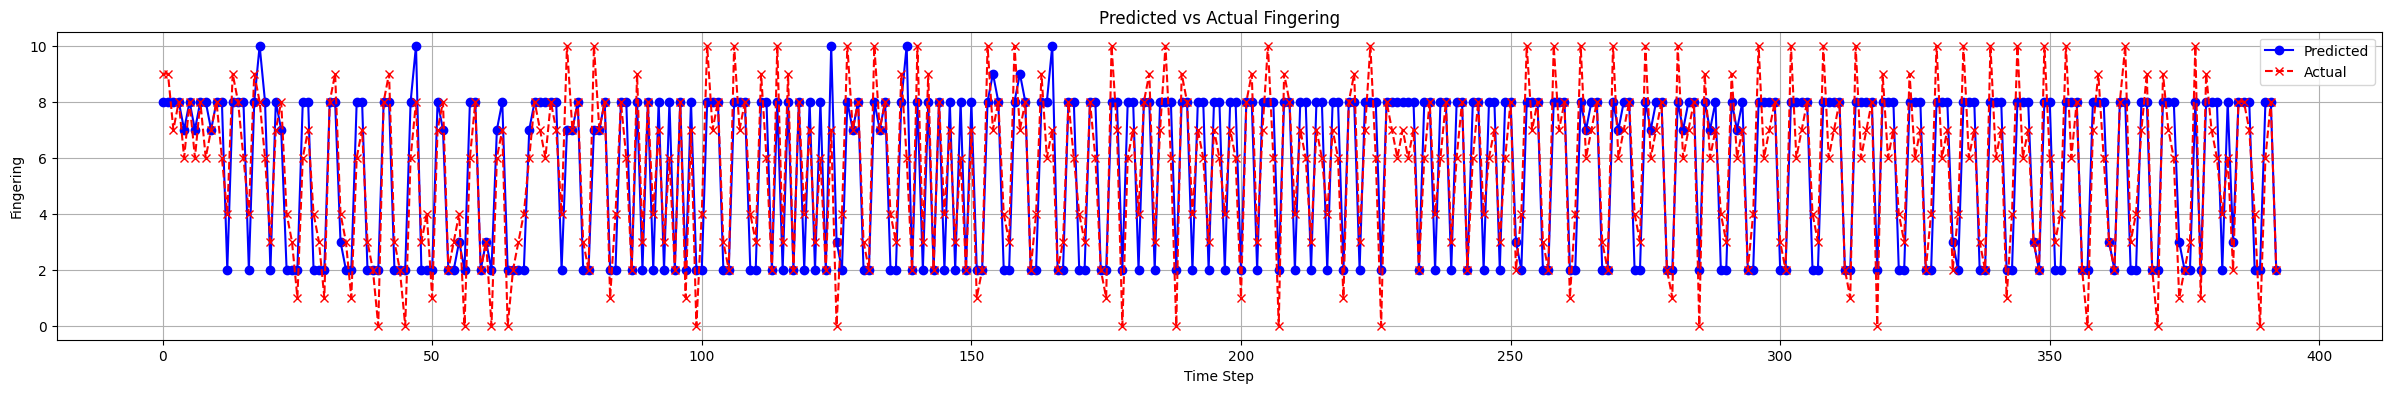

In [101]:
# VISUALIZATION:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Step 6: Visualize the predictions vs actual labels
def visualize_comparison(preds, actuals):
    fig, ax = plt.subplots(figsize=(30, 4))
    x = range(len(preds))
    ax.plot(x, preds, label='Predicted', marker='o', linestyle='-', color='b')
    ax.plot(x, actuals, label='Actual', marker='x', linestyle='--', color='r')

    ax.set_xlabel('Time Step')
    ax.set_ylabel('Fingering')
    ax.set_title('Predicted vs Actual Fingering')
    ax.legend()
    plt.grid(True)
    plt.show()

# Visualize comparison for a few sequences
visualize_comparison(predicted_fingering, labels.tolist())